In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1-(x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return ((3- abs(x))/2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5-2)) / Z
    elif abs(x) > 0.75:
        return (9-8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

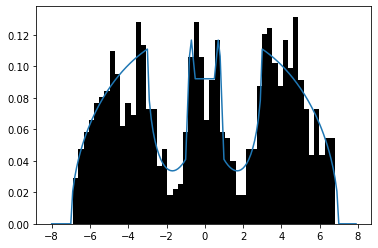

In [7]:
from logging import StringTemplateStyle
def simulation(f, x0, steps):
    total = []
    x = x0
    
    # MCMC metropolis formula
    for i in range(steps):
        y = np.random.normal(x, 2)
        if np.random.uniform() < min(1, f(y) / f(x)):
            x = y
        if i % 100 == 0:
            total.append(x)
            
    return total

x = np.arange(-8, 8, 0.1)
y = [f(xi) for xi in x]

plt.figure()
batman = simulation(f, x0 = 0, steps=100000)
plt.plot(x, y)
plt.hist(batman, density=True, bins = 50, color = 'black')
plt.show()